## HW Supervised Learning

### Agi Rahmawandi <br> Batch 57

### Youtube Views Prediction
Memprediksi views pada video youtube dengan menggunakan angka statistik atau atribut lain pada videonya.

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

In [268]:
df = pd.read_excel('dataset/youtube_statistics.xlsx')
df.head(2)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13


## Exploratory Data Analysis (EDA)

1. Apa kategori video dengan views terbanyak

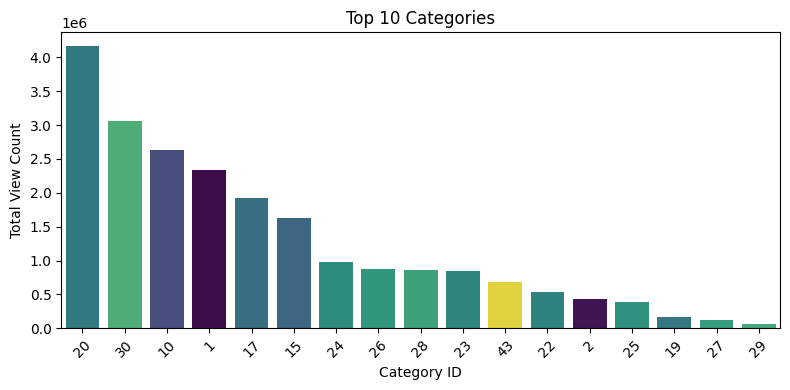

In [269]:
# Membuat top_categories_sorted dengan proses sorting berdasarkan views secara descending
top_categories = df.groupby('category_id')['views'].mean().reset_index()
top_categories_sorted = top_categories.sort_values(by='views', ascending=False)
top_categories_sorted

plt.figure(figsize=(8, 4))
sns.barplot(
    data=top_categories_sorted,
    x='category_id',
    y='views',
    hue='category_id',
    palette='viridis',
    order=top_categories_sorted['category_id'],
    legend=False
)
plt.title('Top 10 Categories')
plt.xlabel('Category ID')
plt.ylabel('Total View Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. Apa Channel youtube dengan view terbanyak

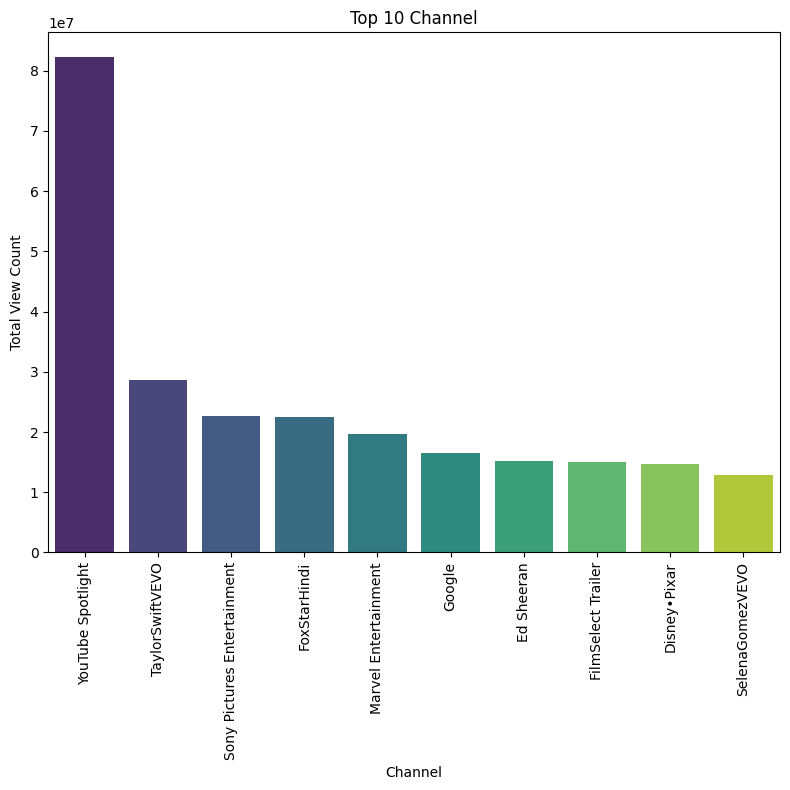

In [270]:
title_top = df.groupby('channel_title')['views'].mean().reset_index()
title_top_sorted = title_top.sort_values(by='views', ascending=False).head(10)
plt.figure(figsize=(8, 8))
sns.barplot(
    data=title_top_sorted,
    x='channel_title',
    y='views',
    hue='channel_title',
    palette='viridis',
    order=title_top_sorted['channel_title'],
    legend=False
)
plt.title('Top 10 Channel')
plt.xlabel('Channel')
plt.ylabel('Total View Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

3. apakah ada hubungan antara banyaknya jumlah view dan jumlah like 

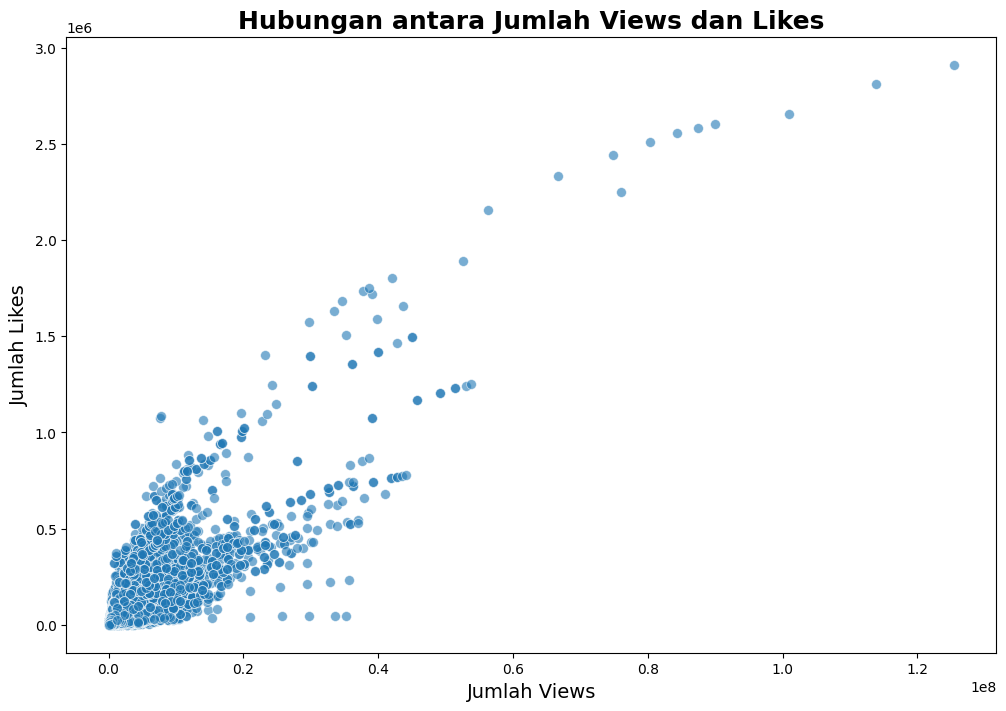

In [271]:
plt.figure(figsize=(12, 8))

# Membuat scatter plot menggunakan Seaborn
sns.scatterplot(
    x='views',          # Sumbu X: Kolom 'views'
    y='likes',          # Sumbu Y: Kolom 'likes'
    data=df,            # Sumber data: DataFrame yang sudah dimuat
    alpha=0.6,          # Mengatur transparansi titik untuk melihat kepadatan data
    edgecolor='w',      # Warna pinggiran titik (putih)
    s=50                # Ukuran titik
)

# 6. Tambahkan label dan judul untuk plot
plt.title(
    'Hubungan antara Jumlah Views dan Likes',
    fontsize=18,
    fontweight='bold'
)
plt.xlabel('Jumlah Views', fontsize=14)
plt.ylabel('Jumlah Likes', fontsize=14)

# 7. Tampilkan plot
plt.show()


In [272]:
#korelasi views dan likes
correlation = df['views'].corr(df['likes'])
print(f'Korelasi antara views dan likes sebesar: {correlation:.2f}')

Korelasi antara views dan likes sebesar: 0.85


4. apakah ada perbedaan views ketika kolom komentar didisable atau tidak

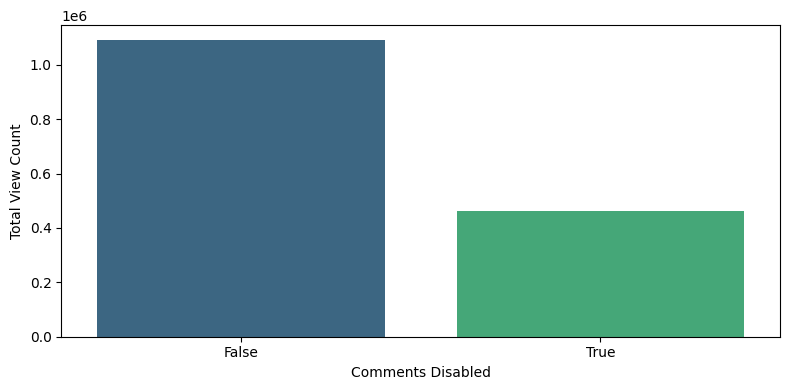

,comments_disabled,views
0,False,1.091630e+06
1,True,4.636920e+05


In [273]:
comment = df.groupby('comments_disabled')['views'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(
    data=comment,
    x='comments_disabled',
    y='views',
    hue='comments_disabled',
    palette='viridis',
    order=comment['comments_disabled'],
    legend=False
)

plt.xlabel('Comments Disabled')
plt.ylabel('Total View Count')
plt.tight_layout()
plt.show()
comment

5. video youtube dengan views terbanyak

In [274]:
top_videos = df.sort_values(by='views', ascending=False).head(5)
top_videos[['title','views','likes']]


,title,views,likes
5300,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,125432237,2912710
5019,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217,2811216
4838,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,100911567,2656672
4383,Marvel Studios' Avengers: Infinity War Officia...,89930713,2606663
4148,Marvel Studios' Avengers: Infinity War Officia...,87449453,2584674


## Descriptive Statistics

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [276]:
numeric_col= df.select_dtypes(include=['int64']).columns
object_col = df.select_dtypes(include=['object']).columns
bool_col = df.select_dtypes(include=['bool']).columns
date_time_col = df.select_dtypes(include=['datetime64[ns]']).columns

In [277]:
print("Numeric Columns:")
display(df[numeric_col].describe().map('{:.2f}'.format).T)
print("Object Columns:")
display(df[object_col].describe())
print("Boolean Columns:")
display(df[bool_col].describe())
print("Date Time Columns:")
display(df[date_time_col].describe())

Numeric Columns:


,count,mean,std,min,25%,50%,75%,max
category_id,36791.00,21.55,6.59,1.00,23.00,24.00,24.00,43.00
views,36791.00,1071490.26,3207149.05,4024.00,125604.00,307836.00,806631.50,125432237.00
likes,36791.00,27450.69,97831.29,0.00,879.00,3126.00,14095.00,2912710.00
dislikes,36791.00,1685.36,16197.32,0.00,109.00,331.00,1032.00,1545017.00
comment_count,36791.00,2714.02,14978.11,0.00,83.00,336.00,1314.50,827755.00
No_tags,36791.00,18.94,9.84,1.00,12.00,19.00,25.00,72.00
desc_len,36791.00,923.08,815.04,3.00,368.00,677.00,1237.00,5136.00
len_title,36791.00,70.61,22.41,5.00,53.00,74.00,91.00,100.00


Object Columns:


,trending_date,title,channel_title,publish_time,tags,description
count,36791,36791,36791,36791,36791,36746
unique,205,16431,1390,12375,12463,13979
top,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,199,19,284,333,1120,166


Boolean Columns:


,comments_disabled,ratings_disabled,video_error_or_removed
count,36791,36791,36791
unique,2,2,2
top,False,False,False
freq,35611,36034,36780


Date Time Columns:


,publish_date
count,36791
mean,2018-02-24 11:20:36.334973440
min,2017-05-27 00:00:00
25%,2017-12-31 00:00:00
50%,2018-02-23 00:00:00
75%,2018-04-23 00:00:00
max,2018-06-13 00:00:00


- Terdapat nilai null pada kolom description
- Type data tidak sesuai pada colom trending_date harusnya type data datetime
- Dari nilai standar deviasinya data cukup beragam
- Pada beberapa kolom terdapat perbedaan yang cukup jauh antara mean dan mediannya artinya data memiliki outlier 



## Univariate Analisys

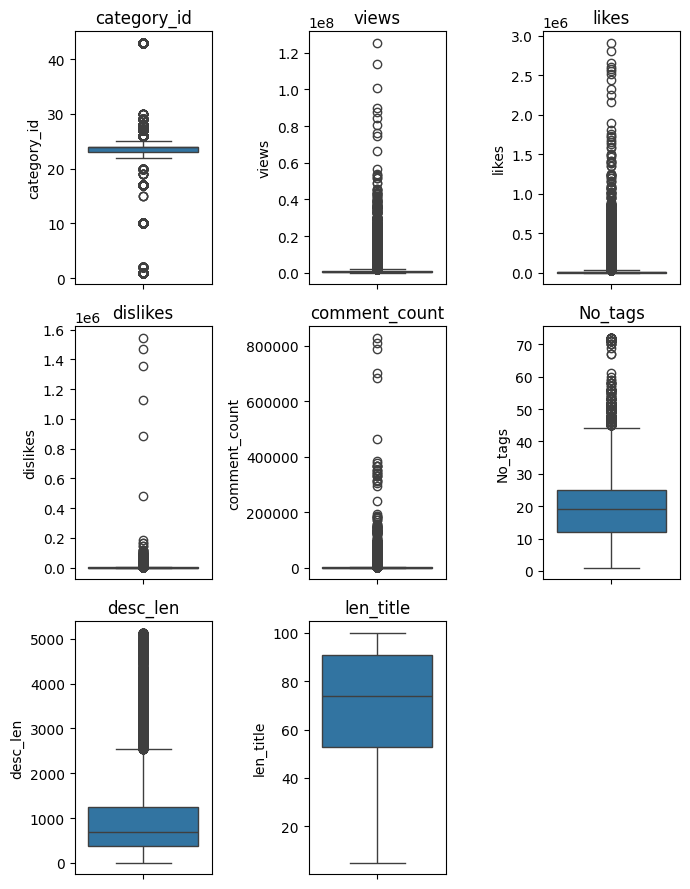

In [278]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_col)/3)), ncols=3, figsize=(7, 9))
axes = axes.flatten()

for i, col in enumerate(numeric_col):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(len(numeric_col), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

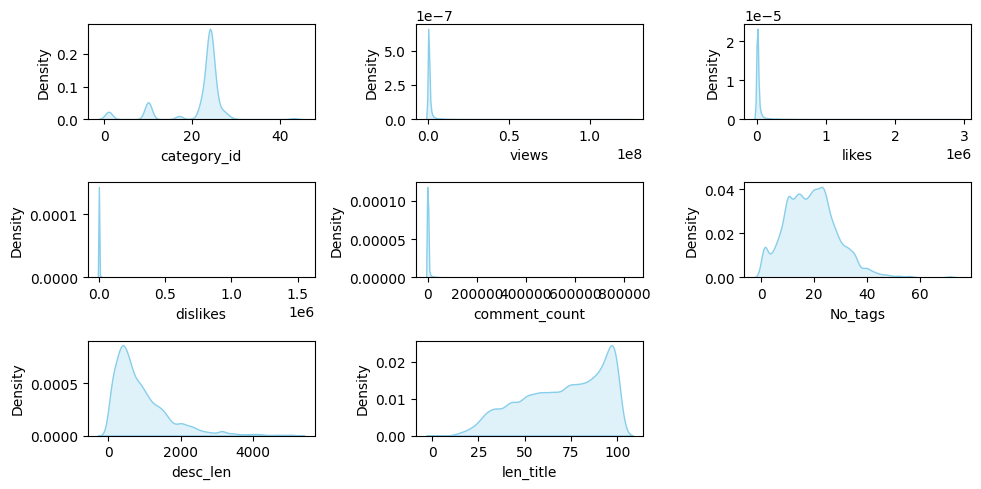

In [279]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate(numeric_col):
    sns.kdeplot(df[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

for j in range(len(numeric_col), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

- Hampir semua kolom numerik terihat ada outlier terutapa pada kolom views dislike, like dan comment count terdapat outlier yang cukup jauh dari iqrnya.
- hampir seluruh kolom datanya tidak terdistribusi normal/skewed


## Multivariate Analisys

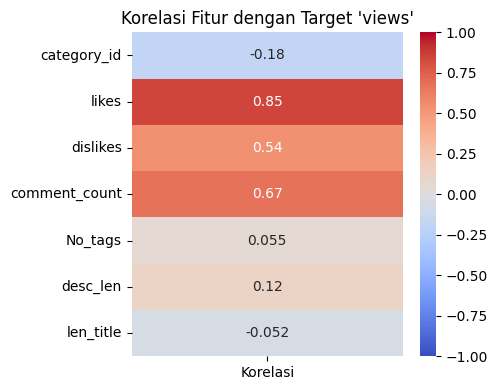

In [280]:
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi terhadap 'exclusive' dan ubah ke DataFrame (dengan kolom)
correlation_with_target = numerical_cols.corr()['views'].drop('views').to_frame()

# Optional: beri nama kolom agar lebih jelas
correlation_with_target.columns = ['Korelasi']

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelasi Fitur dengan Target 'views'")
plt.tight_layout()
plt.show()


<Axes: >

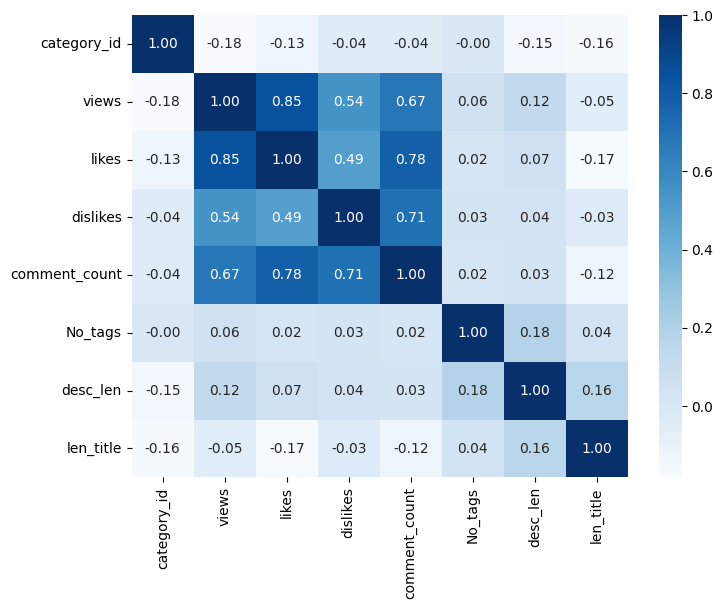

In [281]:
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_cols.corr(), cmap='Blues', annot=True, fmt='.2f')

- Kolom yang berkorelasi kuat dengan target (‘views’) ialah like, dislike,comment count berada di atas 0.5. 
- Sama halnya korelasi antar feature ketiga kolom like, dislike, serta commen_count berkorelasi cukup kuat(redundan)
- Category_id, no_tags, desc_len, len_title  memiliki korelasi hampi mendekati nol dengan sebagian besar feature.


## Data Cleansing

### Handle missing values

In [282]:
df_cleaned = df.copy()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [283]:
df_cleaned.dropna(subset=['description'], inplace=True)

### Handle duplicate data

In [284]:
# Tampilkan semua baris yang terlibat dalam duplikasi
df_cleaned.duplicated(keep='first').sum()


np.int64(4228)

In [285]:
#hapus baris duplikat
df_cleaned.drop_duplicates(keep='first', inplace=True)

Menyisakan satu baris awal dari dari data yang duplikat

### Menyesuaikan type data 

In [286]:
# ubah tyoedata kolom trending-date menjadi datetime
df_cleaned['trending_date'] = pd.to_datetime(df_cleaned['trending_date'])

# Mengubah kolom 'publish_time' menjadi tipe datetime
df_cleaned['publish_time'] = pd.to_datetime(df_cleaned['publish_time'], format='%H:%M:%S', errors='coerce')

In [287]:
df_cleaned.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,1900-01-01 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,1900-01-01 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,1900-01-01 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,1900-01-01 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,1900-01-01 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


## Handling outlier

In [288]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_cleaned)}')
numerical_cols
filtered_entries = np.array([True] * len(df_cleaned))
for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_cleaned[col] >= low_limit) & (df_cleaned[col] <= high_limit)) & filtered_entries

df_cleaned = df_cleaned[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_cleaned)}')

Jumlah baris sebelum memfilter outlier: 32518
Jumlah baris setelah memfilter outlier: 19577


## Feature enginering

### Feature Selection

Menyeleksi feature numeric :<br>
dislike, like, comment_count ketiganya memiliki nilai korelasi yang kuat satu sama lain, dan berkorelasi kaut juga dengan target, maka salah satu kolom akan didrop yakni kolom comment_count karena redundan cukup tinggi dengan kolom like dan dislike.

In [289]:
#hapus kolom dislike, commend_count, No_tags, dan len_title
df_cleaned.drop(columns=['comment_count'], inplace=True)

In [290]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19577 entries, 1 to 36769
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           19577 non-null  datetime64[ns]
 1   title                   19577 non-null  object        
 2   channel_title           19577 non-null  object        
 3   category_id             19577 non-null  int64         
 4   publish_time            19577 non-null  datetime64[ns]
 5   tags                    19577 non-null  object        
 6   views                   19577 non-null  int64         
 7   likes                   19577 non-null  int64         
 8   dislikes                19577 non-null  int64         
 9   comments_disabled       19577 non-null  bool          
 10  ratings_disabled        19577 non-null  bool          
 11  video_error_or_removed  19577 non-null  bool          
 12  description             19577 non-null  object     

### Feature Encoding

In [291]:
df_cleaned['category_id'].unique()

array([25, 24, 22, 23])

In [292]:
df_encoded = pd.get_dummies(df_cleaned, columns=['category_id'], prefix='category')


metode one hot encoding untuk kolom category_id

### Feature extraction

Membuat feature baru dari feature publish_date 

In [293]:
df_encoded.publish_date = pd.to_datetime(df_encoded.publish_date)
to_one_hot = df_encoded.publish_date.dt.day_name()
days = pd.get_dummies(to_one_hot)

In [294]:
day_names = df_encoded.publish_date.dt.day_name()
is_weekend = day_names.apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0).to_frame()
is_weekend = is_weekend.rename(columns={'publish_date':'is_weekend'})

In [295]:
df_encoded = pd.concat([df_encoded, days], axis=1)
df_encoded= pd.concat([df_encoded, is_weekend], axis=1)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19577 entries, 1 to 36769
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           19577 non-null  datetime64[ns]
 1   title                   19577 non-null  object        
 2   channel_title           19577 non-null  object        
 3   publish_time            19577 non-null  datetime64[ns]
 4   tags                    19577 non-null  object        
 5   views                   19577 non-null  int64         
 6   likes                   19577 non-null  int64         
 7   dislikes                19577 non-null  int64         
 8   comments_disabled       19577 non-null  bool          
 9   ratings_disabled        19577 non-null  bool          
 10  video_error_or_removed  19577 non-null  bool          
 11  description             19577 non-null  object        
 12  No_tags                 19577 non-null  int64      

## Modeling

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# PREPARE DATA

# Load data (pastikan sudah preprocessed sebelumnya)
df = df_encoded.copy()  # Gunakan dataframe hasil encoding dan pembersihan

# Pilih fitur numerik dan boolean
features = df.select_dtypes(["float64", "int64", "boolean"]).columns
x = df[features].drop("views", axis=1)
y = df.views

# Split data menjadi train/test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=1/3, random_state=42)

# Standarisasi hanya fitur X (bukan target y)
scaler = RobustScaler()
scaler.fit(xtrain)
xtrain_std = scaler.transform(xtrain)
xtest_std = scaler.transform(xtest)


# FUNCTION Evaluasi Model
def eval_model(name, model, xtrain, ytrain, xtest, ytest):
    ytrain_pred = model.predict(xtrain)
    ytest_pred = model.predict(xtest)

    r2_train = r2_score(ytrain, ytrain_pred)
    r2_test = r2_score(ytest, ytest_pred)

    print(f"Model: {name}")
    print(" Training Metrics:")
    print(" - R^2     :", round(r2_train, 4))
    print(" - MAE     :", round(mean_absolute_error(ytrain, ytrain_pred), 4))
    print(" - RMSE    :", round(np.sqrt(mean_squared_error(ytrain, ytrain_pred)), 4))

    print(" Testing Metrics:")
    print(" - R^2     :", round(r2_test, 4))
    print(" - MAE     :", round(mean_absolute_error(ytest, ytest_pred), 4))
    print(" - RMSE    :", round(np.sqrt(mean_squared_error(ytest, ytest_pred)), 4))

    # Deteksi Overfitting/Underfitting
    print("Model Diagnosis:")
    if r2_train - r2_test > 0.15:
        print(" Overfitting terdeteksi , Model terlalu bagus di training, tapi buruk di testing.")
    elif r2_train < 0.6 and r2_test < 0.6:
        print("Underfitting kemungkinan terjadi, Model gagal mempelajari pola baik dari data.")
    else:
        print("Model digeneralisasi dengan baik.")

#model yang digunakan
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "LGBMRegressor": LGBMRegressor(random_state=42)
}

# for name, model in models.items():
#     model.fit(xtrain_std, ytrain)
#     eval_model(name, model, xtrain_std, ytrain, xtest_std, ytest)

In [298]:
#function plot
def plot_diagnostics(name, model, xtest, ytest):
    y_pred = model.predict(xtest)
    residuals = ytest - y_pred

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Diagnostik Model: {name}", fontsize=14)

    # Scatter plot: Predicted vs Actual
    sns.scatterplot(x=ytest, y=y_pred, ax=axes[0])
    axes[0].set_xlabel("Aktual")
    axes[0].set_ylabel("Prediksi")
    axes[0].set_title("Prediksi vs Aktual")
    axes[0].plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--')

    # Residual plot
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[1])
    axes[1].axhline(0, color='red', linestyle='--')
    axes[1].set_xlabel("Prediksi")
    axes[1].set_ylabel("Residual (Aktual - Prediksi)")
    axes[1].set_title("Residual Plot")

    plt.tight_layout()
    plt.show()

In [299]:
for name, model in models.items():
    model.fit(xtrain_std, ytrain)

    # Prediksi train dan test
    y_train_pred = model.predict(xtrain_std)
    y_test_pred  = model.predict(xtest_std)

    # Evaluasi dan analisis over/underfitting
    eval_model(name, model, xtrain_std, ytrain, xtest_std, ytest)
    # # # Plot visualisasi
    # plot_diagnostics(name, ytest, y_test_pred)

Model: LinearRegression
📊 Training Metrics:
 - R^2     : 0.468
 - MAE     : 143352.6074
 - RMSE    : 213248.7381
📊 Testing Metrics:
 - R^2     : 0.4737
 - MAE     : 143459.0941
 - RMSE    : 214821.6837
Model Diagnosis:
Underfitting kemungkinan terjadi, Model gagal mempelajari pola baik dari data.
Model: RandomForest
📊 Training Metrics:
 - R^2     : 0.9592
 - MAE     : 35738.8006
 - RMSE    : 59068.5475
📊 Testing Metrics:
 - R^2     : 0.7301
 - MAE     : 95618.6604
 - RMSE    : 153829.7892
Model Diagnosis:
 Overfitting terdeteksi , Model terlalu bagus di training, tapi buruk di testing.
Model: HistGradientBoosting
📊 Training Metrics:
 - R^2     : 0.7881
 - MAE     : 87826.1877
 - RMSE    : 134597.1508
📊 Testing Metrics:
 - R^2     : 0.6862
 - MAE     : 104935.3179
 - RMSE    : 165877.2464
Model Diagnosis:
Model digeneralisasi dengan baik.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001700 seconds.
You can set `force_row_wise=true` to remove th

In [300]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Inisialisasi model dasar
lgbm = LGBMRegressor(random_state=42)

# 2. Tentukan ruang pencarian hyperparameter
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(100, 500, 10)],
    'max_depth': [5, 10, 15, 20, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],     # L1 regularization
    'reg_lambda': [0, 0.1, 0.5, 1.0]     # L2 regularization
}

# 3. Setup RandomizedSearchCV
model = LGBMRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
# 4. Fit model ke data training
random_search.fit(xtrain_std, ytrain)

# 5. Lihat hasil terbaik
print("Best Parameters:", random_search.best_params_)
print("Best CV Score (R^2):", random_search.best_score_)

# 6. Gunakan model terbaik
best_lgbm = random_search.best_estimator_

# 7. Prediksi dan evaluasi
best_model = random_search.best_estimator_
y_pred = best_model.predict(xtest_std)

print("\n🎯 Test Performance:")
print("R²     :", r2_score(ytest, y_pred))
print("MAE    :", mean_absolute_error(ytest, y_pred))
print("RMSE   :", np.sqrt(mean_squared_error(ytest, y_pred)))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 13051, number of used features: 19
[LightGBM] [Info] Start training from score 291738.659183
Best Parameters: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 1.0, 'n_estimators': 411, 'max_depth': -1, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Best CV Score (R^2): 0.7490654804076066

🎯 Test Performance:
R²     : 0.7588868809211248
MAE    : 88255.6416041511
RMSE   : 145399.3519065641


In [301]:
# Fungsi menampilkan feature importance
def show_feature_importance(model, feature_names):
    importances = model.feature_importances_
    feat_importances = pd.Series(importances, index=feature_names)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance - LightGBM')
    plt.tight_layout()
    plt.show()

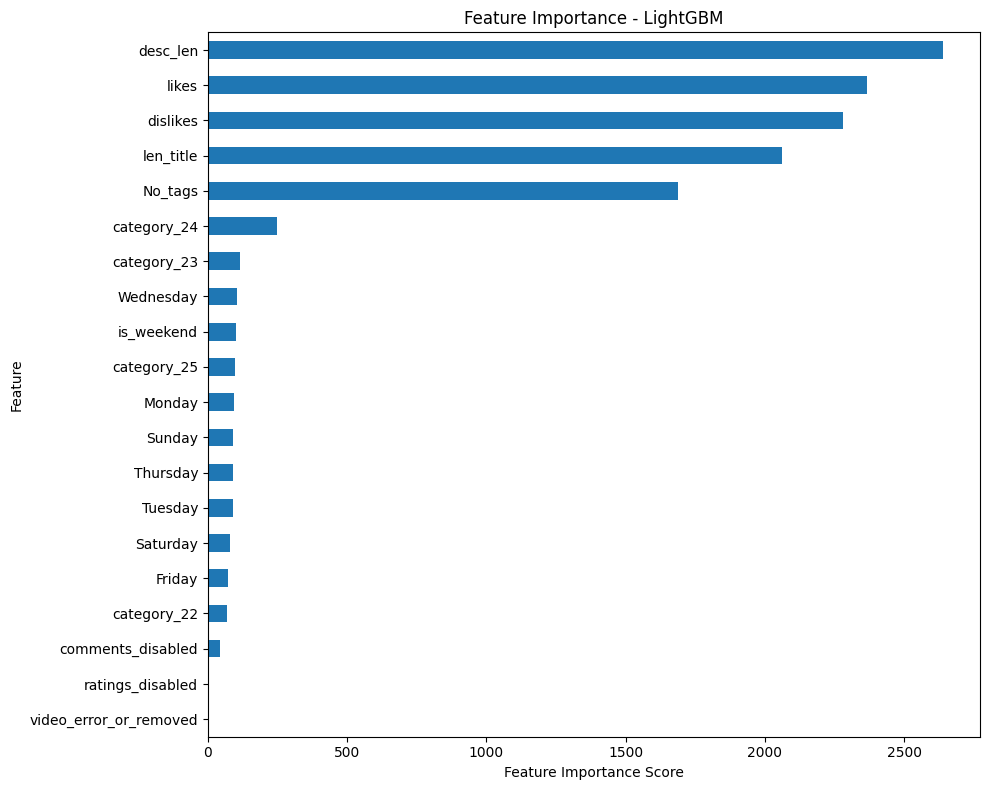

In [302]:
# Tampilkan feature importance
show_feature_importance(best_lgbm, x.columns)

In [303]:
# plot_diagnostics("LGBM Tuned", best_lgbm, xtest_std, ytest)